<a href="https://colab.research.google.com/github/Oliz888/DL_course/blob/main/chapter_preliminaries/data_preprocessing_2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
:label:`sec_pandas`

So far, we have been working with synthetic data
that arrived in ready-made tensors.
However, to apply deep learning in the wild
we must extract messy data
stored in arbitrary formats,
and preprocess it to suit our needs.
Fortunately, the *pandas* [library](https://pandas.pydata.org/)
can do much of the heavy lifting.
This section, while no substitute
for a proper *pandas* [tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html),
will give you a crash course
on some of the most common routines.

## Reading the Dataset

Comma-separated values (CSV) files are ubiquitous
for the storing of tabular (spreadsheet-like) data.
In them, each line corresponds to one record
and consists of several (comma-separated) fields, e.g.,
"Albert Einstein,March 14 1879,Ulm,Federal polytechnic school,field of gravitational physics".
To demonstrate how to load CSV files with `pandas`,
we (**create a CSV file below**) `../data/house_tiny.csv`.
This file represents a dataset of homes,
where each row corresponds to a distinct home
and the columns correspond to the number of rooms (`NumRooms`),
the roof type (`RoofType`), and the price (`Price`).


In [1]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

`os.path.join('..', 'data')`

🔹 Joins '..' (parent directory) and 'data' into a valid OS path → results in '../data'
🔹 Keeps code cross-platform (Windows/Linux/Mac)

`os.makedirs(...)`

🔹 Creates the directory '../data' (and any missing parent directories).

`exist_ok=True`

🔹 Avoids raising an error if the directory already exists — this is Python 3.2+ syntax.


`data_file = os.path.join('..', 'data', 'house_tiny.csv')`

🔹Creates a file path string by joining folder '../data' and file name 'house_tiny.csv'.

🔹data_file now holds '../data/house_tiny.csv'.

`with open(data_file, 'w') as f:`

- with ... as is a context manager — ensures the file is automatically closed after writing (even if an error occurs).

- open(data_file, 'w')

  🔹 Opens the file in write mode ('w')

  🔹 If the file doesn't exist, it creates it. If it does exist, it overwrites it.

- as f binds the file object to the variable f.

    f.write('''''')

- f.write(...) writes the given string to the file.

- Triple quotes '''...''' define a multi-line string literal in Python.

- The string content:


Now let's import `pandas` and load the dataset with `read_csv`.


In [2]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


## Data Preparation

In supervised learning, we train models
to predict a designated *target* value,
given some set of *input* values.
Our first step in processing the dataset
is to separate out columns corresponding
to input versus target values.
We can select columns either by name or
via integer-location based indexing (`iloc`).

You might have noticed that `pandas` replaced
all CSV entries with value `NA`
with a special `NaN` (*not a number*) value.
This can also happen whenever an entry is empty,
e.g., "3,,,270000".
These are called *missing values*
and they are the "bed bugs" of data science,
a persistent menace that you will confront
throughout your career.
Depending upon the context,
missing values might be handled
either via *imputation* or *deletion*.
Imputation replaces missing values
with estimates of their values
while deletion simply discards
either those rows or those columns
that contain missing values.

Here are some common imputation heuristics.
[**For categorical input fields,
we can treat `NaN` as a category.**]
Since the `RoofType` column takes values `Slate` and `NaN`,
`pandas` can convert this column
into two columns `RoofType_Slate` and `RoofType_nan`.
A row whose roof type is `Slate` will set values
of `RoofType_Slate` and `RoofType_nan` to 1 and 0, respectively.
The converse holds for a row with a missing `RoofType` value.


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


For missing numerical values,
one common heuristic is to
[**replace the `NaN` entries with
the mean value of the corresponding column**].


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


## Conversion to the Tensor Format

Now that [**all the entries in `inputs` and `targets` are numerical,
we can load them into a tensor**] (recall :numref:`sec_ndarray`).


In [ ]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## Discussion

You now know how to partition data columns,
impute missing variables,
and load `pandas` data into tensors.
In :numref:`sec_kaggle_house`, you will
pick up some more data processing skills.
While this crash course kept things simple,
data processing can get hairy.
For example, rather than arriving in a single CSV file,
our dataset might be spread across multiple files
extracted from a relational database.
For instance, in an e-commerce application,
customer addresses might live in one table
and purchase data in another.
Moreover, practitioners face myriad data types
beyond categorical and numeric, for example,
text strings, images,
audio data, and point clouds.
Oftentimes, advanced tools and efficient algorithms
are required in order to prevent data processing from becoming
the biggest bottleneck in the machine learning pipeline.
These problems will arise when we get to
computer vision and natural language processing.
Finally, we must pay attention to data quality.
Real-world datasets are often plagued
by outliers, faulty measurements from sensors, and recording errors,
which must be addressed before
feeding the data into any model.
Data visualization tools such as [seaborn](https://seaborn.pydata.org/),
[Bokeh](https://docs.bokeh.org/), or [matplotlib](https://matplotlib.org/)
can help you to manually inspect the data
and develop intuitions about
the type of problems you may need to address.


## Exercises

1. Try loading datasets, e.g., Abalone from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?
1. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) has further details on how to do this.
1. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?
1. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?
1. What alternatives to pandas can you think of? How about [loading NumPy tensors from a file](https://numpy.org/doc/stable/reference/generated/numpy.load.html)? Check out [Pillow](https://python-pillow.org/), the Python Imaging Library.


[Discussions](https://discuss.d2l.ai/t/29)


In [3]:
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip abalone.zip

--2025-06-07 06:58:13--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip’

abalone.zip             [  <=>               ]  54.06K   210KB/s    in 0.3s    

2025-06-07 06:58:14 (210 KB/s) - ‘abalone.zip’ saved [55357]

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


In [8]:
import pandas as pd
column_names = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole_weight',
    'Shucked_weight',
    'Viscera_weight',
    'Shell_weight',
    'Rings'
]
data_file = 'abalone.data'
data = pd.read_csv(data_file, names = column_names)
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


from matplotlib import pyplot as plt
data['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Diameter'].plot(kind='hist', bins=20, title='Diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Whole_weight'].plot(kind='hist', bins=20, title='Whole_weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Length', y='Diameter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Diameter', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Height', y='Whole_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Whole_weight', y='Shucked_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Length'].plot(kind='line', figsize=(8, 4), title='Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Diameter'].plot(kind='line', figsize=(8, 4), title='Diameter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Whole_weight'].plot(kind='line', figsize=(8, 4), title='Whole_weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Length', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Diameter', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Height', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Whole_weight', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1UOCMHUehqoJPmuYoGra3mm34Ohssa9Zmy25sCEebUsg/edit#gid=0


# EX1

In [14]:
# Checking missing values in each column, a positive sum indicates the existence of missing entries in a given column
missing_values_absolute = data.isnull().sum()
# Calculate the ratio of missing values for each column
missing_values_ratio = (data.isnull().sum() / len(data)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values_absolute,
    'Percentage (%)': missing_values_ratio
})

print(missing_data)

                Missing Values  Percentage (%)
Sex                          0             0.0
Length                       0             0.0
Diameter                     0             0.0
Height                       0             0.0
Whole_weight                 0             0.0
Shucked_weight               0             0.0
Viscera_weight               0             0.0
Shell_weight                 0             0.0
Rings                        0             0.0


In [15]:
data.describe(include = "all")

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


***Answer:***

According to the above table and plot, there is no missing value across all 9 variables, and only sex is categorical variable, all others are numeric variables

## EX2

In [19]:
inputs, targets = data.loc[:, data.columns != 'Rings'], data.loc[:, 'Rings']
print(f'inputs={inputs}')
print(f'targets={targets}')

inputs=     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        

## EX3

In [ ]:
import numpy as np
import psutil
import time

def memory_usage():
    memory = psutil.virtual_memory()
    print(f"Total system memory: {memory.total / (1024 ** 3):.2f} GB")
    print(f"Used memory: {memory.used / (1024 ** 3):.2f} GB")
    print(f"Available memory: {memory.available / (1024 ** 3):.2f} GB")

sizes = [10, 100, 1000]
for size in sizes:
    print(f"> Loading {size} million rows of data.")
    start_time = time.time()
    df = pd.DataFrame({"random": np.random.randn(size * 10 ** 6)})
    memory_usage()
    elapsed_time = time.time() - start_time
    print(f"Elapsed time: {elapsed_time:.2f} seconds\n")
    del df


> Loading 10 million rows of data.
Total system memory: 12.67 GB
Used memory: 1.23 GB
Available memory: 11.14 GB
Elapsed time: 0.44 seconds

> Loading 100 million rows of data.
Total system memory: 12.67 GB
Used memory: 1.91 GB
Available memory: 10.47 GB
Elapsed time: 3.73 seconds

> Loading 1000 million rows of data.


- Pandas loads entire DataFrames into RAM → memory usage becomes a bottleneck with large datasets



***How to handle large CSVs (30+ GB):***

Use chunking:

`pd.read_csv('file.csv', chunksize=100000)`

- Use data types optimization: convert float64 to float32, use category dtype for text
- Use Dask or Polars: these libraries can process larger-than-RAM datasets
- Preprocess in a language like Go or C for streaming, then save in binary format like Parquet

## EX4

This is a classic data science interview question — it tests your judgment on:

***Dimensionality vs. Usefulness***

- Too many categories can explode the feature space (especially with one-hot encoding)
- You must decide which ones to keep, encode, or drop

***Feature engineering and modeling implications***

- Are these categories meaningful, or just IDs?
- Do they help generalize, or do they just cause overfitting?  

***How to approach it in practice***

✅ If there are many categories:
- Use frequency encoding: replace each category with how often it appears
- Use target encoding: replace category with average target value for that group
- Use embedding layers: useful for deep learning (e.g., in NLP or recsys)
- Combine rare categories into an “Other” bucket

⚠️ If every label is unique (e.g., user IDs):
- These usually don't carry generalizable meaning
- One-hot encoding creates very sparse, high-dimensional data — can cause overfitting
- Consider dropping the feature unless:
    - You're building user-specific models
    - You're aggregating behavior by ID (e.g., using stats like avg spend per user)



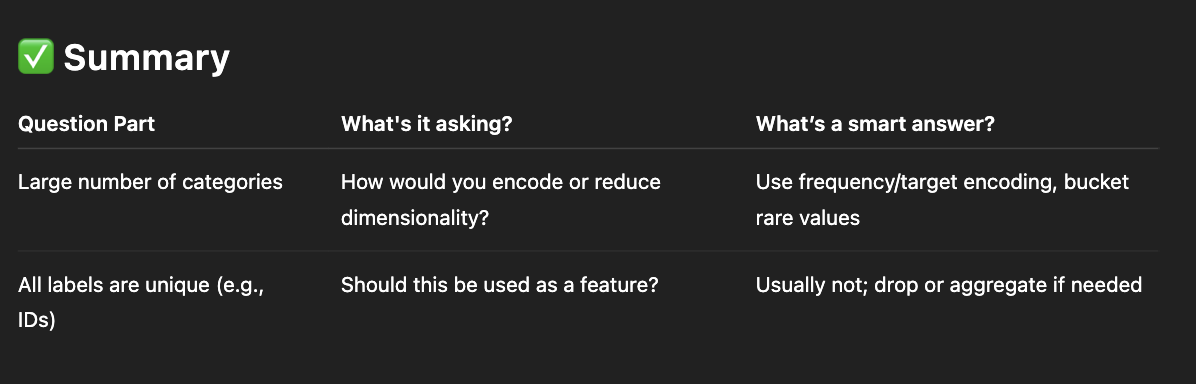

## EX5

Let’s compare Python, NumPy, Pillow, Dask, Polars, etc., especially in the context of:

Working with tensors or arrays
- Performance
- Parallelism
- Memory efficiency
- Suitability for large datasets

## 🔧 1. Python (pure)
- Native Python lists or nested lists: `[[1, 2], [3, 4]]`
- Flexible and readable but extremely slow for numerical work
- No vectorization; uses interpreted loops
- Not suitable for large data or tensor ops

✅ Good for: Control logic, glue code

❌ Bad for: Any numeric computation


## 🔢 2. NumPy
- The standard tensor-like array library in Python
- Built with C under the hood → fast and vectorized
- Supports broadcasting, slicing, element-wise operations
- Works in-memory — struggles with datasets larger than RAM
- Not inherently parallel; operations happen on a single core


```
import numpy as np
a = np.array([[1, 2], [3, 4]])
print(a * 2)  # Element-wise multiply
```
✅ Good for: Fast numerical arrays in memory

❌ Bad for: Out-of-core data, native parallelism

## 🖼 3. Pillow (PIL fork)
- Not for tensors in the math sense, but for image data
- Loads/saves images, supports format conversion
- Often used alongside NumPy to process image tensors

```
from PIL import Image
img = Image.open('image.jpg')
array = np.array(img)
```
✅ Good for: Loading/saving/resizing images

❌ Bad for: General numerical tensor ops

## 📦 4. Dask
- Scales NumPy and Pandas to larger-than-RAM datasets
- Performs lazy computation via task graphs
- Supports parallelism and distributed computing
- Very similar API to NumPy or Pandas

```
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x.sum().compute()
```
✅ Good for: Parallel and big data arrays

❌ Bad for: Small, in-memory computations (has overhead)

## ⚡️ 5. Polars
- Modern, Rust-based DataFrame library (super fast)
- Great for columnar operations, similar to Pandas
- Supports lazy evaluation and multithreading
- Limited support for true tensor math like NumPy


```
import polars as pl
df = pl.DataFrame({
    "a": [1, 2, 3],
    "b": [4, 5, 6]
})
print(df.select(pl.col("a") * 2))
```
✅ Good for: Fast tabular processing, CSVs, joins

❌ Bad for: Multidimensional tensor math

## ⚙️ 6. PyTorch / TensorFlow
- Designed specifically for tensor computation
- GPU acceleration
- Autograd for deep learning
- Torch tensors are similar to NumPy arrays but more powerful


```
import torch
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(x + 2)
```
✅ Good for: Deep learning, GPU compute, gradients

❌ Overkill for simple analysis or tabular data






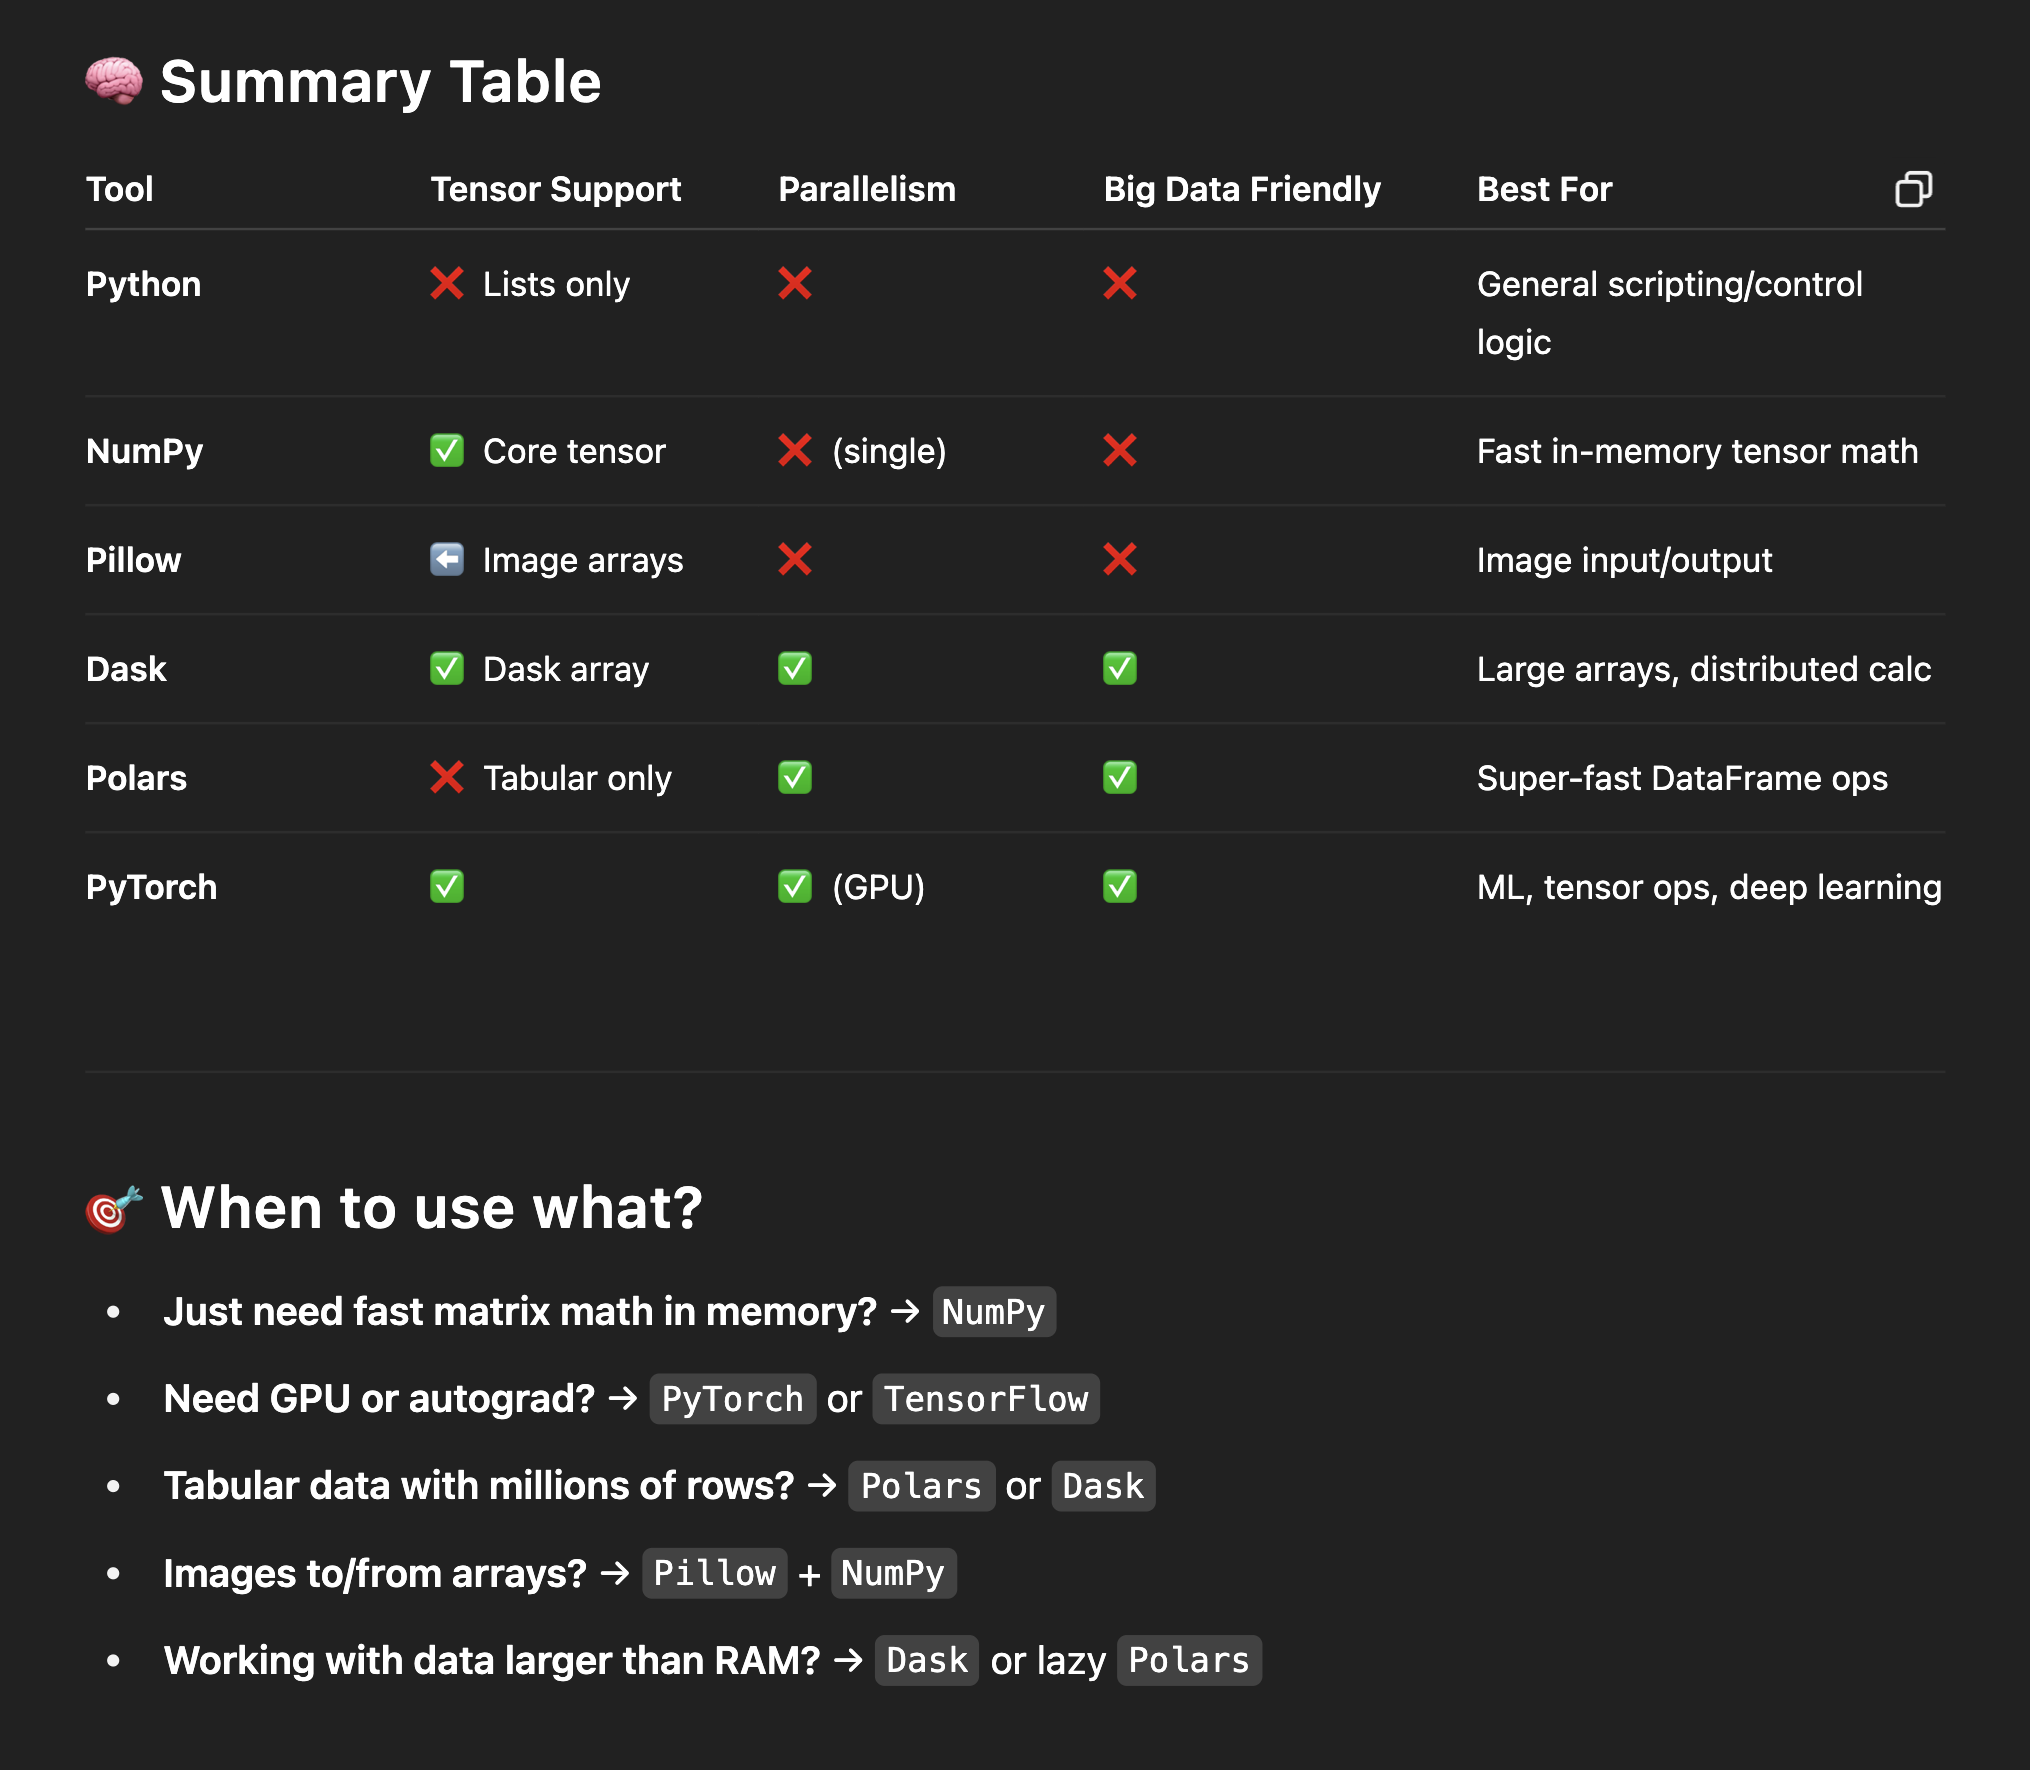

-----
### NOTE: frequency encoding, target encoding, embeddding layer, bucket rare value, one-hot encoding

In [1]:
import pandas as pd

df = pd.DataFrame({
    'User': ['Alice', 'Bob', 'Alice', 'Diana', 'Eve', 'Frank', 'Eve', 'Alice'],
    'Product': ['Apple', 'Banana', 'Apple', 'Banana', 'Cherry', 'Apple', 'Apple', 'Cherry'],
    'Purchased': [1, 0, 1, 0, 1, 0, 1, 1]
})

print(df)

    User Product  Purchased
0  Alice   Apple          1
1    Bob  Banana          0
2  Alice   Apple          1
3  Diana  Banana          0
4    Eve  Cherry          1
5  Frank   Apple          0
6    Eve   Apple          1
7  Alice  Cherry          1


# 1️⃣ One-hot Encoding (🧩 basic, high-dimensional)

In [2]:
pd.get_dummies(df['Product'])

,Apple,Banana,Cherry
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,False,False,True
5,True,False,False
6,True,False,False
7,False,False,True


# 2️⃣ Frequency Encoding (📊 how common is each label?)

In [3]:
freq = df['Product'].value_counts()
df['Product_freq'] = df['Product'].map(freq)

print(df[['Product', 'Product_freq']])

  Product  Product_freq
0   Apple             4
1  Banana             2
2   Apple             4
3  Banana             2
4  Cherry             2
5   Apple             4
6   Apple             4
7  Cherry             2


🔹 Simple, handles many categories
🔸 Assumes frequent = meaningful (not always true)



# 3️⃣ Target Encoding (🎯 mean target value per category)

In [4]:
mean_target = df.groupby('Product')['Purchased'].mean()
df['Product_target_enc'] = df['Product'].map(mean_target)

print(df[['Product', 'Product_target_enc']])

  Product  Product_target_enc
0   Apple                0.75
1  Banana                0.00
2   Apple                0.75
3  Banana                0.00
4  Cherry                1.00
5   Apple                0.75
6   Apple                0.75
7  Cherry                1.00


🔹 Great when the category is correlated with the target
🔸 Can leak target info if not properly cross-validated

# 4️⃣ Bucketing Rare Categories (📦 group infrequent into “Other”)

In [5]:
counts = df['User'].value_counts()
rare_users = counts[counts == 1].index
df['User_bucketed'] = df['User'].apply(lambda x: 'Other' if x in rare_users else x)

print(df[['User', 'User_bucketed']])

    User User_bucketed
0  Alice         Alice
1    Bob         Other
2  Alice         Alice
3  Diana         Other
4    Eve           Eve
5  Frank         Other
6    Eve           Eve
7  Alice         Alice


# 5️⃣ Embedding Layer (🧠 deep learning)

In [6]:
import torch
from torch import nn

# Step 1: Label encode categories
product_to_idx = {prod: i for i, prod in enumerate(df['Product'].unique())}
df['Product_idx'] = df['Product'].map(product_to_idx)

# Step 2: Create embedding layer
num_categories = len(product_to_idx)
embedding_dim = 4  # small latent vector

embedding = nn.Embedding(num_categories, embedding_dim)

# Step 3: Use it
product_tensor = torch.tensor(df['Product_idx'].values)
embedded = embedding(product_tensor)

print(embedded)

tensor([[-8.0950e-01, -7.8849e-01,  7.3005e-01, -4.2423e-02],
        [-1.3478e+00,  3.7554e-01,  4.1899e-04, -1.1672e+00],
        [-8.0950e-01, -7.8849e-01,  7.3005e-01, -4.2423e-02],
        [-1.3478e+00,  3.7554e-01,  4.1899e-04, -1.1672e+00],
        [-1.3356e+00, -6.9545e-01,  1.1670e+00,  4.8935e-01],
        [-8.0950e-01, -7.8849e-01,  7.3005e-01, -4.2423e-02],
        [-8.0950e-01, -7.8849e-01,  7.3005e-01, -4.2423e-02],
        [-1.3356e+00, -6.9545e-01,  1.1670e+00,  4.8935e-01]],
       grad_fn=<EmbeddingBackward0>)


🔹 Compact and expressive
🔸 Requires training with model → cannot use alone

| Method             | Pros                   | Cons                     | Use case                              |
| ------------------ | ---------------------- | ------------------------ | ------------------------------------- |
| One-hot            | Simple, model-friendly | High-dimensional         | Small categorical columns             |
| Frequency encoding | Memory-efficient       | May not reflect meaning  | High-cardinality, non-deep models     |
| Target encoding    | Powerful               | Needs careful validation | When categories correlate with target |
| Rare bucket        | Simplifies categories  | May lose detail          | Long-tail features (e.g. usernames)   |
| Embedding layer    | Low-dim, expressive    | Needs model training     | Deep learning, recommendation systems |
